<a href="https://colab.research.google.com/github/vijji5432/Zeotap_Assignment/blob/main/Alekhya_Vijji_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

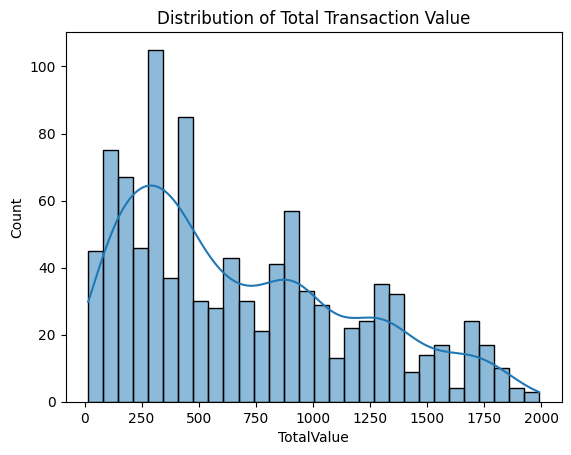

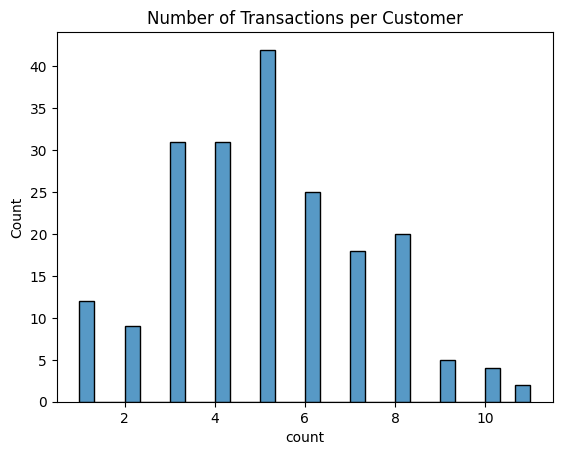

<ipython-input-14-c260eacd9b56>:34: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  merged_df.set_index('TransactionDate').resample('M')['TotalValue'].sum().plot()


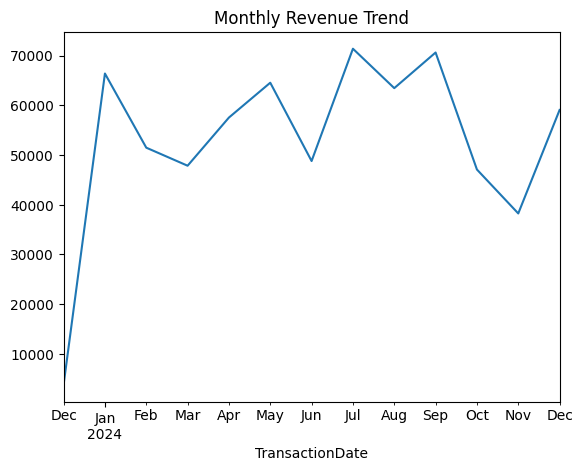

Top 10 Products Sold:
 ProductName
ActiveWear Smartwatch    100
SoundWave Headphones      97
HomeSense Desk Lamp       81
ActiveWear Rug            79
SoundWave Cookbook        78
ActiveWear Jacket         76
BookWorld Biography       71
TechPro T-Shirt           66
SoundWave Desk Lamp       64
TechPro Textbook          62
Name: Quantity, dtype: int64

 EDA Completed. Save visualizations in the PDF report.


In [14]:
#Exploratory Data Analysis (EDA)

# Import Required Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load Datasets
customers = pd.read_csv("/content/Customers.csv")
transactions = pd.read_csv("/content/Transactions.csv")
products = pd.read_csv("/content/Products.csv")

# Drop missing values if necessary
customers.dropna(inplace=True)
transactions.dropna(inplace=True)
products.dropna(inplace=True)

# Merge Data
merged_df = transactions.merge(customers, on="CustomerID").merge(products, on="ProductID")
#merged_df.rename(columns={"Price_x": "TransactionPrice", "Price_y": "ProductPrice"}, inplace=True)

# Data Visualization
sns.histplot(merged_df['TotalValue'], bins=30, kde=True)
plt.title("Distribution of Total Transaction Value")
plt.show()

sns.histplot(merged_df['CustomerID'].value_counts(), bins=30)
plt.title("Number of Transactions per Customer")
plt.show()

# Monthly Revenue Trends
merged_df['TransactionDate'] = pd.to_datetime(merged_df['TransactionDate'])
merged_df.set_index('TransactionDate').resample('M')['TotalValue'].sum().plot()
plt.title("Monthly Revenue Trend")
plt.show()

# Top-Selling Products
top_products = merged_df.groupby("ProductName")["Quantity"].sum().sort_values(ascending=False).head(10)
print("Top 10 Products Sold:\n", top_products)

#  Save EDA Report (Manually convert this into PDF)
with open("FirstName_LastName_EDA.txt", "w") as f:
    f.write("Top-Selling Products:\n")
    f.write(str(top_products))

print("\n EDA Completed. Save visualizations in the PDF report.")
